In [1]:
import numpy as np
import pandas as pd

# Let's start with Spam Data

In [2]:
SpamData = pd.read_csv('https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/spambase.csv')

In [3]:
AllVariables = SpamData.columns.values

In [4]:
X = SpamData[AllVariables]
del X['is_spam']
X.shape  #You have 4601 inputs and 57 variables

(4601, 57)

In [5]:
from sklearn.decomposition import PCA
clf = PCA(.99)  #you enough principle components to capture 99% of variability
X_trans = clf.fit_transform(X)
X_trans.shape #You have 4601 inputs and only 2 components!

(4601, 2)

In [6]:
y = SpamData['is_spam']

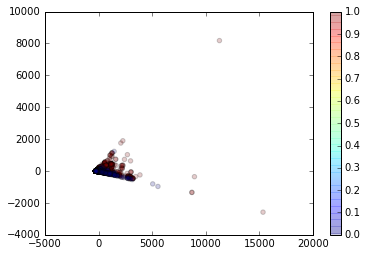

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_trans[:, 0], X_trans[:, 1],c=y, alpha=0.2)
plt.colorbar();

In [8]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_trans,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:

from sklearn.cross_validation import cross_val_score
print(cross_val_score(lm,X_trans,y,cv=10).mean()) 
MisClassificationError = 1 - (cross_val_score(lm,X_trans,y,cv=10).mean())
print(MisClassificationError)  #our misclassification Error is 27 percent!

0.725943529979
0.274056470021


In [10]:
misclass =[]
for i in range(1,40):
    clf = PCA(i)  #i principle components
    X_trans = clf.fit_transform(X)
    MisClassificationError = 1 - (cross_val_score(lm,X_trans,y,cv=10).mean())
    misclass.append(MisClassificationError)
print min(misclass)    

0.0858778509884


# Let's work with Digit data

In [11]:
from sklearn.datasets import load_digits

In [12]:
digits = load_digits()
X = digits.data
y = digits.target

In [ ]:
print digits.DESCR

In [ ]:
print X.shape
print y


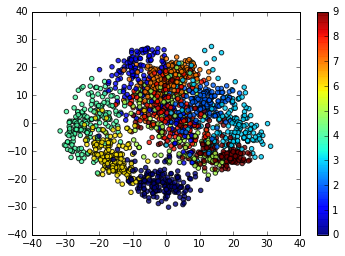

In [13]:
pca = PCA(2)
X_pc_handwriting = pca.fit_transform(X)
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_pc_handwriting[:, 0], X_pc_handwriting[:, 1],c=y, alpha=0.8)
plt.colorbar();

In [14]:
from sklearn import neighbors, metrics
from sklearn.cross_validation import cross_val_score
misclass = []
for i in range(1,40):
    clf = PCA(i)
    X_trans = clf.fit_transform(X)
    knn = neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform')
    knn.fit(X_trans,y)
    MisClassificationError = 1 - (cross_val_score(knn,X_trans,y,cv=10).mean())
    misclass.append(MisClassificationError)
print min(misclass)
# We can achieve CV error rate of 1.99%! This is awesome! 

0.0199900610085


[  1.48905936e-01   1.36187712e-01   1.17945938e-01   8.40997942e-02
   5.78241466e-02   4.91691032e-02   4.31598701e-02   3.66137258e-02
   3.35324810e-02   3.07880621e-02   2.37234084e-02   2.27269657e-02
   1.82186331e-02   1.77385494e-02   1.46710109e-02   1.40971560e-02
   1.31858920e-02   1.24813782e-02   1.01771796e-02   9.05617439e-03
   8.89538461e-03   7.97123157e-03   7.67493255e-03   7.22903569e-03
   6.95888851e-03   5.96081458e-03   5.75614688e-03   5.15157582e-03
   4.89539777e-03   4.28887968e-03   3.73606048e-03   3.53274223e-03
   3.36683986e-03   3.28029851e-03   3.08320884e-03   2.93778629e-03
   2.56588609e-03   2.27742397e-03   2.22277922e-03   2.11430393e-03
   1.89909062e-03   1.58652907e-03   1.51159934e-03   1.40578764e-03
   1.16622290e-03   1.07492521e-03   9.64053065e-04   7.74630271e-04
   5.57211553e-04   4.04330693e-04   2.09916327e-04   8.24797098e-05
   5.25149980e-05   5.05243719e-05   3.29961363e-05   1.24365445e-05
   7.04827911e-06   3.01432139e-06

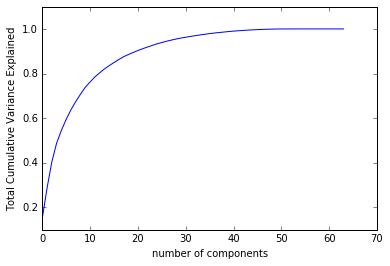

In [17]:
AllPCAs = PCA().fit(X)
print AllPCAs.explained_variance_ratio_
plt.xlabel('number of components')
plt.ylabel('Total Cumulative Variance Explained')
plt.plot(np.cumsum(AllPCAs.explained_variance_ratio_))

# Number of components is what you see in the graph +1 ! (we could easily solve this)

# Some cool demonstrations!

Acknowledgment: This work is done by Prof. Jake VanderPlas - Director of Research in Physical Sciences for Univesity of Washington's eScience institute.

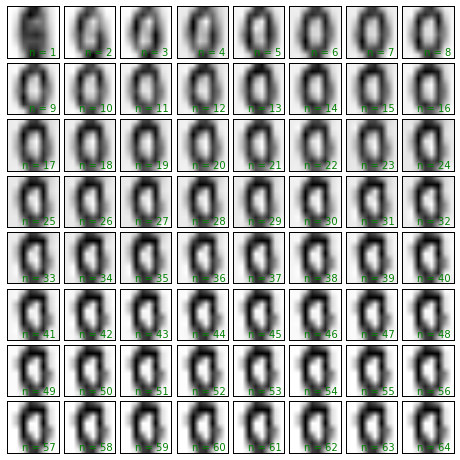

In [15]:
from sklearn.decomposition import PCA

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))
    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

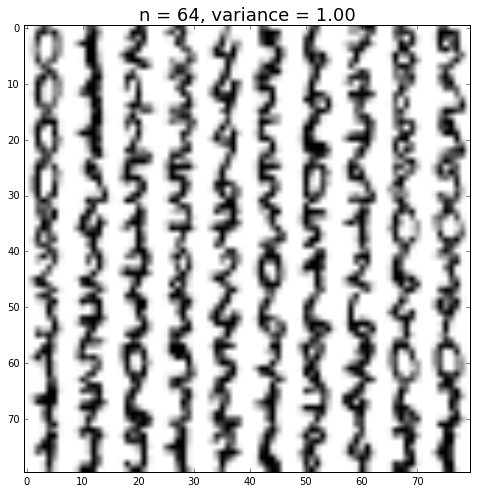

In [16]:
from sklearn.decomposition import PCA

from IPython.html.widgets import interact
import matplotlib.pyplot as plt
%matplotlib inline
def plot_digits(n_components):
    plt.figure(figsize=(8, 8))
    nside = 10
    
    pca = PCA(n_components).fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    Xproj = np.reshape(Xproj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()
    
    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im,cmap='Greys')
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
              size=18)
    plt.clim(0, 16)
    
interact(plot_digits, n_components=[1, 64], nside=[1, 8]);